##  Lead Scoring Case Study
### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### Goals of the Case Study:

There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads   which can be used by the company to target potential leads. A higher score would mean that the   lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is     cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust   to if the company's requirement changes in the future so you will need to handle these as well.   These problems are provided in a separate doc file. Please fill it based on the logistic       regression model you got in the first step. 

### Step 1: Importing the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries 
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing datasets
Education = pd.read_csv('Leads.csv')
Education.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [4]:
#check the dimensions of the dataframe
Education.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Education.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the type of each column
Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Preparation

#### Converting Select to null 

In [7]:
#Converting 'Select' in all columns to Null values.
Education = Education.replace('Select', np.nan)

#### Checking for Missing Values and Imputing Them

In [8]:
# Checking missing values (column-wise)
Education.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [9]:
# Checking the percentage of missing values
null_percent=round(100*(Education.isnull().sum()/len(Education.index)), 2).sort_values(ascending=False)
null_percent

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
# Dropping nullvalue columns above 45 %
above_45_null=([null_percent[null_percent>45].index])
Education.drop(labels=above_45_null[0],axis=1,inplace=True)

In [11]:
# Checking percentage of missing values after removing the missing values above 45%
round(100*(Education.isnull().sum()/len(Education.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### Treating Null values in City Column

In [12]:
# Checking value counts percentage
Education['City'].value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

We can replace null values with Mumbai as it is the mode of city column ie,Mumbai

In [13]:
#Replacing Null values with "Mumbai" and checking value counts 
Education['City'] = Education['City'].replace(np.nan,'Mumbai')
Education['City'].value_counts(normalize=True,dropna=False)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

##### Treating Null values in  Specialization Columns

In [14]:
# Checking value counts percentage
Education['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Null values are very high in percentage so we cannot replace with mode and therefore we can mention it as 'Not Mentioned'

In [15]:
#Replacing Null values with "Not Mentioned" and checking value counts 
Education['Specialization'] = Education['Specialization'].replace(np.nan,'Not Mentioned')
Education['Specialization'].value_counts(dropna=False)

Not Mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### Treating Null values in Tags Columns

In [16]:
Education['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [17]:
#Replacing Null values with "Not Mentioned" and checking value counts 
Education['Tags'] = Education['Tags'].replace(np.nan,'Not Mentioned')
Education['Tags'].value_counts(dropna=False)

Not Mentioned                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

##### Treating 'What matters most to you in choosing a course' Columns

In [18]:
# Checking value counts percentage
Education['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

Replacing null values with mode ie,Better Career Prospects

In [19]:
#Replacing Null values with "Better Career Prospects" and checking value counts 
Education['What matters most to you in choosing a course'] = Education['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
Education['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

##### Treating 'What is your current occupation' Columns

In [20]:
# Checking value counts percentage
Education['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

We can replace null values with mode of occupation column ie,Unemployed

In [21]:
#Replacing Null values with "What is your current occupation" and checking value counts 
Education['What is your current occupation'] = Education['What is your current occupation'].replace(np.nan,'Unemployed')
Education['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

##### Treating 'Country' Columns

In [22]:
# Checking value counts percentage
Education['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Nigeria                 0.000433
Kuwait                  0.000433
Germany                 0.000433
Canada                  0.000433
South Africa            0.000433
Sweden                  0.000325
Belgium                 0.000216
Netherlands             0.000216
Uganda                  0.000216
Ghana                   0.000216
China                   0.000216
Bangladesh              0.000216
Italy                   0.000216
Asia/Pacific Region     0.000216
Philippines             0.000216
Indonesia               0.000108
Liberia   

We can replace null values with mode of Country column ie,India

In [23]:
#Replacing Null values with "What is your current occupation" and checking value counts 
Education['Country'] = Education['Country'].replace(np.nan,'India')
Education['Country'].value_counts(normalize=True,dropna=False)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
South Africa            0.000433
Kuwait                  0.000433
Germany                 0.000433
Nigeria                 0.000433
Canada                  0.000433
Sweden                  0.000325
Ghana                   0.000216
Italy                   0.000216
Bangladesh              0.000216
Uganda                  0.000216
Belgium                 0.000216
Philippines             0.000216
China                   0.000216
Asia/Pacific Region     0.000216
Netherlands             0.000216
Indonesia               0.000108
Kenya                   0.000108
Switzerlan

In [24]:
#Remove missing values below 2%
Education = Education.dropna()
# Checking percentage of missing values after removing the missing values below 2%
round(100*(Education.isnull().sum()/len(Education.index)), 2).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

All missing values are treated.

#### Checking Imbalance in data and Dropping the columns

In [25]:
# Checking the categorical columns
cat_cols= Education.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
yes_No_columns=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque',
'A free copy of Mastering The Interview']

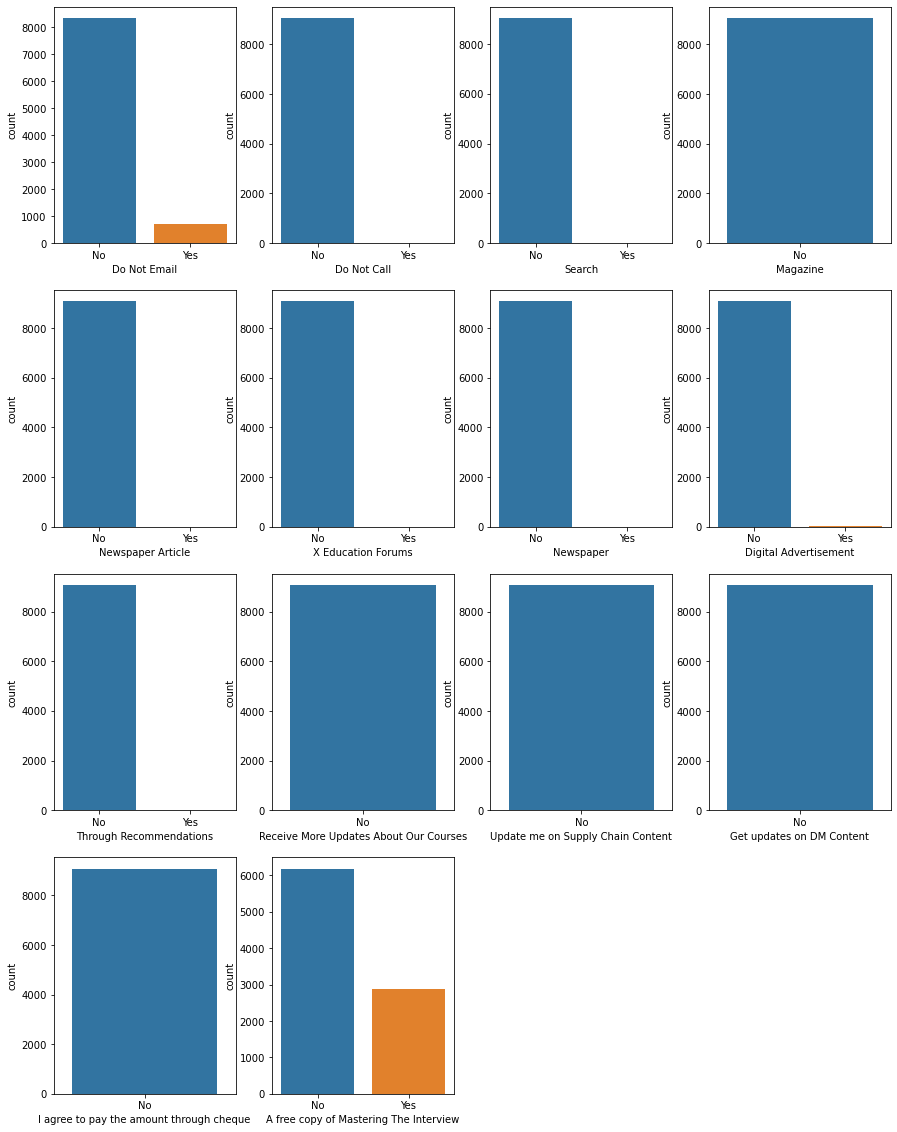

In [27]:
#Plotting barplot for categorical columns for checking the data imbalance in yes/no columns
import itertools
plt.figure(figsize=[15,20])
for i,j in itertools.zip_longest(yes_No_columns, range(len(yes_No_columns))):
    plt.subplot(4,4,j+1)
    sns.countplot(Education[i])
    

Inference:

The columns 'Do Not Email','A free copy of Mastering The Interview' are having both Yes and No response so we can keep that columns.

The columns 'Through Recommendations','Do Not Call','Search','Newspaper Article',
'X Education Forums','Newspaper', 'Digital Advertisement' are having very less percentage of Yes and high percentage of No response hence it shows data imbalance therefore we can drop these columns

The columns'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' are having only No response so this will not help in any analysis therefore we can drop these columns.


In [28]:
# Forming list of columns to be dropped which are not useful for analysis
#'Prospect ID', 'Lead Number' will not help in analysis so we can drop them.
# Also drop the columns which has high data imbalance
drop_columns=['Prospect ID', 'Lead Number','Do Not Call','Search','Magazine','Newspaper Article',
'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content',
'Get updates on DM Content','I agree to pay the amount through cheque']
Education = Education.drop(drop_columns,axis=1)

In [29]:
Education.shape

(9074, 16)

#### Converting  binary variables (Yes/No) to 0/1

In [30]:
# Checking the categorical columns
cat_cols= Education.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
# List of variables to map
varlist =  ['Do Not Email','A free copy of Mastering The Interview',]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the Education list
Education[varlist] = Education[varlist].apply(binary_map)

In [32]:
#Checking dataset after encoding binary values.
Education[varlist].sample(5)

,Do Not Email,A free copy of Mastering The Interview
8486,0,1
469,0,1
2371,0,0
1107,0,0
827,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [33]:
#Remove binary columns and checking remaining categorical columns for one-hot encoding
cat_cols=cat_cols.drop(varlist)

In [34]:
cat_cols1=[ 'Country','Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Tags', 'City']

In [35]:
Education=Education.drop(cat_cols1,1)

In [36]:
Education.shape

(9074, 10)

In [37]:
#Create dummies and drop the first column and Adding the results to the master dataframe
dummy = pd.get_dummies(Education[['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity']], drop_first=True)
Education = pd.concat([Education,dummy],1)

In [38]:
#checking dataframe after creating dummies
Education.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [39]:
# We have created dummies for the below variables, so we can drop the
Education = Education.drop(['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity'], 1)

In [40]:
#Checking the dimensions of the data
Education.shape

(9074, 60)

In [41]:
Education.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9074 non-null   int64  
 1   Converted                                           9074 non-null   int64  
 2   TotalVisits                                         9074 non-null   float64
 3   Total Time Spent on Website                         9074 non-null   int64  
 4   Page Views Per Visit                                9074 non-null   float64
 5   A free copy of Mastering The Interview              9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                 9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                           9074 non-null   uint8  
 8   Lead Origin_Lead Import                             9074 non-null   uint8  
 9

Now you can see that you have all variables which are needed for modelling as numeric.

In [42]:
Education.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.378554,3.456028,482.887481,2.370151,0.318272,0.538351,0.064029,0.003306,0.280251,...,0.000110,0.001543,0.360040,0.020168,0.035045,0.000110,0.237161,0.003527,0.004959,0.000110
std,0.269608,0.485053,4.858802,545.256560,2.160871,0.465831,0.498554,0.244818,0.057407,0.449147,...,0.010498,0.039251,0.480038,0.140581,0.183904,0.010498,0.425365,0.059283,0.070251,0.010498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking for Outliers

In [43]:
# Checking for outliers in the continuous variables
num_Education = Education[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_Education

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.0,0,0.00
1,5.0,674,2.50
2,2.0,1532,2.00
3,1.0,305,1.00
4,2.0,1428,1.00
...,...,...,...
9235,8.0,1845,2.67
9236,2.0,238,2.00
9237,2.0,199,2.00
9238,3.0,499,3.00


In [44]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Education.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


<AxesSubplot:ylabel='Page Views Per Visit'>

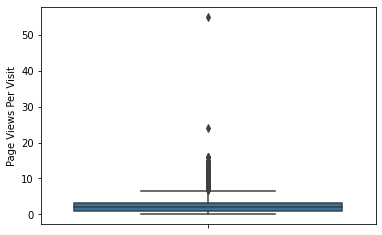

In [45]:
sns.boxplot(y=Education['Page Views Per Visit'])

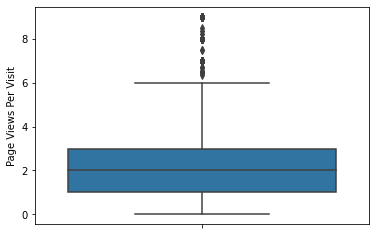

In [46]:
Q3 = Education['Page Views Per Visit'].quantile(0.99)
Education = Education[Education['Page Views Per Visit'] <= Q3]
Q1 = Education['Page Views Per Visit'].quantile(0.01)
Education = Education[Education['Page Views Per Visit'] >= Q1]
sns.boxplot(y=Education['Page Views Per Visit'])
plt.show()

<AxesSubplot:ylabel='Total Time Spent on Website'>

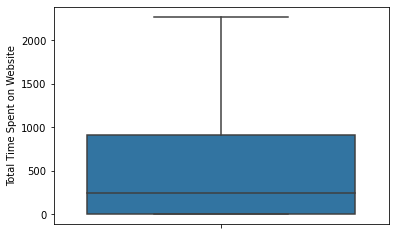

In [47]:
sns.boxplot(y=Education['Total Time Spent on Website'])

<AxesSubplot:ylabel='TotalVisits'>

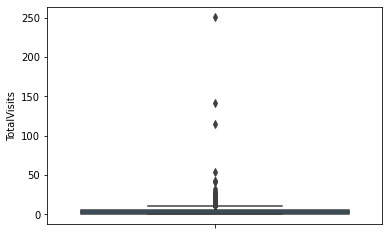

In [48]:
sns.boxplot(y=Education['TotalVisits'])

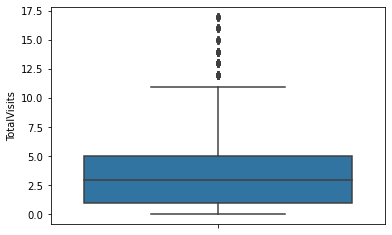

In [49]:
Q3 = Education['TotalVisits'].quantile(0.99)
Education = Education[Education['TotalVisits'] <= Q3]
Q1 = Education['TotalVisits'].quantile(0.01)
Education = Education[Education['TotalVisits'] >= Q1]
sns.boxplot(y=Education['TotalVisits'])
plt.show()

### Step 4: Test-Train Split

In [50]:
# Putting feature variable to X
X = Education.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Putting response variable to y
y = Education['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [53]:
scaler = StandardScaler()
X_train[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6676,-0.285584,-0.049636,1.395668,0.395289,-0.669212,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6138,-0.285584,0.297929,0.609686,0.926758,-0.669212,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8650,-0.285584,-0.049636,1.178657,0.395289,1.494296,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3423,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
### Checking the Converted Rate
Converted= (sum(Education['Converted'])/len(Education['Converted'].index))*100
Converted

37.75212909009413

We have almost 38% Converted rate.

### Step 6: Looking at Correlations

#### Dropping highly correlated dummy variables

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

### Step 7: Model Building


#### Running Your First Training Model

In [55]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6193
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.3
Date:                Fri, 06 May 2022   Deviance:                       5384.7
Time:                        09:58:18   Pearson chi2:                 6.43e+03
No. Iterations:                    32                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 29.7905   1.23e+07   2.43e-06      1.000    -2.4e+07     2.4e+07
Do Not Email                                          -0.3840      0.058     -6.564      0.000      -0.499      -0.269
TotalVisits                                            0.3169      0.051      6.258      0.000       0.218       0.416
Total Time Spent on Website                            1.1139      0.040     27.785      0.000       1.035       1.192
Page Views Per Visit                                  -0.2897      0.056     -5.129      0.000      -0.400      -0.179
A free copy of Mastering The Interview                 0.0016      0.049      0.032      0.975      -0.095       0.098
Lead Origin_Landing Page Submission                   -0.0516      0.105     -0.490      0.624      -0.258       0.155
Lead Origin_Lead Add Form                              1.5409      1.385      1.113      0.266      -1.173       4.255
Lead Origin_Lead Import                               53.7747   6.71e+07   8.01e-07      1.000   -1.32e+08    1.32e+08
Lead Source_Direct Traffic                            -1.1425      1.871     -0.611      0.541      -4.809       2.525
Lead Source_Facebook                                 -53.5136   6.71e+07  -7.97e-07      1.000   -1.32e+08    1.32e+08
Lead Source_Google                                    -0.7994      1.868     -0.428      0.669      -4.462       2.863
Lead Source_Live Chat                                 37.4257   6.71e+07   5.58e-07      1.000   -1.32e+08    1.32e+08
Lead Source_NC_EDM                                  3.212e-06      7.472    4.3e-07      1.000     -14.644      14.644
Lead Source_Olark Chat                                 0.0796      1.868      0.043      0.966      -3.583       3.742
Lead Source_Organic Search                            -0.9186      1.872     -0.491      0.624      -4.587       2.750
Lead Source_Pay per Click Ads                       -112.7753   6.71e+07  -1.68e-06      1.000   -1.32e+08    1.32e+08
Lead Source_Press_Release                            -22.9876   2.47e+05   -9.3e-05      1.000   -4.85e+05    4.85e+05
Lead Source_Reference                                  1.6223      1.273      1.274      0.203      -0.874       4.118
Lead Source_Referral Sites                            -1.2274      1.894     -0.648      0.517      -4.940       2.485
Lead Source_Social Media                            3.813e-06      1.902   2.01e-06      1.000      -3.728       3.728
Lead Source_WeLearn                                   37.1358   6.71e+07   5.53e-07      1.000   -1.32e+08    1.32e+08
Lead Source_Welingak Website                           3.0047      1.450      2.073      0.038       0.163  

### Step 8: Feature Selection Using RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 43),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 17),
 ('Lead Source_google', False, 13),

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link 

##### Assessing the model with StatsModels

Model1

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.7
Date:                Fri, 06 May 2022   Deviance:                       5559.3
Time:                        09:58:25   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2432      0.050    -25.017      0.000      -1.341      -1.146
Total Time Spent on Website                        1.1290      0.039     28.779      0.000       1.052       1.206
Lead Origin_Lead Add Form                          2.3558      0.899      2.622      0.009       0.595       4.117
Lead Origin_Lead Import                            1.3940      0.469      2.971      0.003       0.474       2.314
Lead Source_Olark Chat                             1.1255      0.099     11.367      0.000       0.931       1.320
Lead Source_Reference                              1.8421      0.923      1.995      0.046       0.033       3.652
Lead Source_Welingak Website                       3.1144      1.152      2.703      0.007       0.856       5.372
Last Activity_Converted to Lead                   -1.1389      0.210     -5.425      0.000      -1.550      -0.727
Last Activity_Email Bounced                       -2.2296      0.356     -6.256      0.000      -2.928      -1.531
Last Activity_Had a Phone Conversation             1.8303      0.889      2.059      0.039       0.088       3.573
Last Activity_Olark Chat Conversation             -1.5491      0.160     -9.710      0.000      -1.862      -1.236
Last Activity_Resubscribed to emails              23.6755   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_Unreachable                         -1.3204      0.621     -2.125      0.034      -2.538      -0.102
Last Notable Activity_Had a Phone Conversation    21.7063    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
Last Notable Activity_SMS Sent                     1.5572      0.077     20.138      0.000       1.406       1.709
Last Notable Activity_Unreachable                  3.0625      0.854      3.588      0.000       1.389       4.736
==================================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,49.53
4,Lead Source_Reference,39.11
5,Lead Source_Welingak Website,11.53
8,Last Activity_Had a Phone Conversation,1.67
12,Last Notable Activity_Had a Phone Conversation,1.67
3,Lead Source_Olark Chat,1.54
11,Last Activity_Unreachable,1.53
14,Last Notable Activity_Unreachable,1.53
9,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25


Model2

In [64]:
col1 = col.drop('Last Activity_Resubscribed to emails',1)

In [65]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.0
Date:                Fri, 06 May 2022   Deviance:                       5562.1
Time:                        09:58:25   Pearson chi2:                 6.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.2426      0.050    -25.010      0.000      -1.340      -1.145
Total Time Spent on Website                        1.1288      0.039     28.775      0.000       1.052       1.206
Lead Origin_Lead Add Form                          2.3546      0.899      2.620      0.009       0.593       4.116
Lead Origin_Lead Import                            1.3934      0.469      2.970      0.003       0.474       2.313
Lead Source_Olark Chat                             1.1299      0.099     11.419      0.000       0.936       1.324
Lead Source_Reference                              1.8429      0.923      1.996      0.046       0.033       3.652
Lead Source_Welingak Website                       3.1153      1.152      2.704      0.007       0.857       5.373
Last Activity_Converted to Lead                   -1.1394      0.210     -5.428      0.000      -1.551      -0.728
Last Activity_Email Bounced                       -2.2307      0.356     -6.259      0.000      -2.929      -1.532
Last Activity_Had a Phone Conversation             1.8298      0.889      2.058      0.040       0.088       3.572
Last Activity_Olark Chat Conversation             -1.5526      0.160     -9.733      0.000      -1.865      -1.240
Last Activity_Unreachable                         -1.3211      0.621     -2.126      0.034      -2.539      -0.103
Last Notable Activity_Had a Phone Conversation    21.7062    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
Last Notable Activity_SMS Sent                     1.5558      0.077     20.124      0.000       1.404       1.707
Last Notable Activity_Unreachable                  3.0625      0.854      3.588      0.000       1.390       4.736
==================================================================================================================
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,49.53
4,Lead Source_Reference,39.11
5,Lead Source_Welingak Website,11.53
8,Last Activity_Had a Phone Conversation,1.67
11,Last Notable Activity_Had a Phone Conversation,1.67
3,Lead Source_Olark Chat,1.54
10,Last Activity_Unreachable,1.53
13,Last Notable Activity_Unreachable,1.53
9,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25


Model3

In [67]:
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation',1)

In [68]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2782.7
Date:                Fri, 06 May 2022   Deviance:                       5565.3
Time:                        09:58:25   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2423      0.050    -25.007      0.000      -1.340      -1.145
Total Time Spent on Website                1.1281      0.039     28.767      0.000       1.051       1.205
Lead Origin_Lead Add Form                  2.3540      0.899      2.620      0.009       0.593       4.115
Lead Origin_Lead Import                    1.3924      0.469      2.967      0.003       0.473       2.312
Lead Source_Olark Chat                     1.1291      0.099     11.412      0.000       0.935       1.323
Lead Source_Reference                      1.8419      0.923      1.995      0.046       0.032       3.651
Lead Source_Welingak Website               3.1150      1.152      2.704      0.007       0.857       5.373
Last Activity_Converted to Lead           -1.1394      0.210     -5.428      0.000      -1.551      -0.728
Last Activity_Email Bounced               -2.2305      0.356     -6.259      0.000      -2.929      -1.532
Last Activity_Had a Phone Conversation     2.7534      0.812      3.391      0.001       1.162       4.345
Last Activity_Olark Chat Conversation     -1.5525      0.159     -9.734      0.000      -1.865      -1.240
Last Activity_Unreachable                 -1.3212      0.621     -2.126      0.034      -2.539      -0.103
Last Notable Activity_SMS Sent             1.5556      0.077     20.124      0.000       1.404       1.707
Last Notable Activity_Unreachable          3.0624      0.854      3.588      0.000       1.389       4.735
==========================================================================================================
"""

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,49.53
4,Lead Source_Reference,39.11
5,Lead Source_Welingak Website,11.53
3,Lead Source_Olark Chat,1.54
10,Last Activity_Unreachable,1.53
12,Last Notable Activity_Unreachable,1.53
9,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25
11,Last Notable Activity_SMS Sent,1.14
7,Last Activity_Email Bounced,1.01


Model4

In [70]:
col3 = col2.drop('Lead Origin_Lead Add Form',1)

In [71]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.5
Date:                Fri, 06 May 2022   Deviance:                       5573.0
Time:                        09:58:26   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2359      0.050    -24.942      0.000      -1.333      -1.139
Total Time Spent on Website                1.1255      0.039     28.746      0.000       1.049       1.202
Lead Origin_Lead Import                    1.3839      0.469      2.950      0.003       0.464       2.303
Lead Source_Olark Chat                     1.1258      0.099     11.397      0.000       0.932       1.319
Lead Source_Reference                      4.1880      0.227     18.469      0.000       3.744       4.632
Lead Source_Welingak Website               5.4613      0.725      7.529      0.000       4.040       6.883
Last Activity_Converted to Lead           -1.1443      0.210     -5.454      0.000      -1.555      -0.733
Last Activity_Email Bounced               -2.2350      0.356     -6.274      0.000      -2.933      -1.537
Last Activity_Had a Phone Conversation     2.7468      0.812      3.384      0.001       1.156       4.338
Last Activity_Olark Chat Conversation     -1.5572      0.159     -9.768      0.000      -1.870      -1.245
Last Activity_Unreachable                 -1.3266      0.621     -2.135      0.033      -2.544      -0.109
Last Notable Activity_SMS Sent             1.5519      0.077     20.093      0.000       1.401       1.703
Last Notable Activity_Unreachable          3.0618      0.853      3.588      0.000       1.389       4.734
==========================================================================================================
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.54
9,Last Activity_Unreachable,1.53
11,Last Notable Activity_Unreachable,1.53
8,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25
10,Last Notable Activity_SMS Sent,1.14
3,Lead Source_Reference,1.09
4,Lead Source_Welingak Website,1.03
6,Last Activity_Email Bounced,1.01
1,Lead Origin_Lead Import,1.00


Model5

In [73]:
col4 = col3.drop('Last Activity_Unreachable',1)

In [74]:
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Fri, 06 May 2022   Deviance:                       5579.3
Time:                        09:58:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2481      0.049    -25.271      0.000      -1.345      -1.151
Total Time Spent on Website                1.1274      0.039     28.806      0.000       1.051       1.204
Lead Origin_Lead Import                    1.3972      0.469      2.978      0.003       0.478       2.317
Lead Source_Olark Chat                     1.1349      0.099     11.487      0.000       0.941       1.329
Lead Source_Reference                      4.2000      0.227     18.522      0.000       3.756       4.644
Lead Source_Welingak Website               5.4731      0.725      7.545      0.000       4.051       6.895
Last Activity_Converted to Lead           -1.1332      0.210     -5.401      0.000      -1.544      -0.722
Last Activity_Email Bounced               -2.2252      0.356     -6.246      0.000      -2.923      -1.527
Last Activity_Had a Phone Conversation     2.7591      0.812      3.398      0.001       1.168       4.350
Last Activity_Olark Chat Conversation     -1.5507      0.159     -9.725      0.000      -1.863      -1.238
Last Notable Activity_SMS Sent             1.5623      0.077     20.244      0.000       1.411       1.714
Last Notable Activity_Unreachable          1.7469      0.589      2.968      0.003       0.593       2.901
==========================================================================================================
"""

Model6

In [75]:
col5 = col4.drop('Last Notable Activity_Unreachable',1)
X_train_sm = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.4
Date:                Fri, 06 May 2022   Deviance:                       5588.9
Time:                        09:58:26   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.2367      0.049    -25.167      0.000      -1.333      -1.140
Total Time Spent on Website                1.1266      0.039     28.819      0.000       1.050       1.203
Lead Origin_Lead Import                    1.3857      0.469      2.954      0.003       0.466       2.305
Lead Source_Olark Chat                     1.1275      0.099     11.438      0.000       0.934       1.321
Lead Source_Reference                      4.1998      0.227     18.534      0.000       3.756       4.644
Lead Source_Welingak Website               5.4631      0.725      7.531      0.000       4.041       6.885
Last Activity_Converted to Lead           -1.1441      0.210     -5.455      0.000      -1.555      -0.733
Last Activity_Email Bounced               -2.2350      0.356     -6.274      0.000      -2.933      -1.537
Last Activity_Had a Phone Conversation     2.7477      0.812      3.385      0.001       1.157       4.339
Last Activity_Olark Chat Conversation     -1.5574      0.159     -9.770      0.000      -1.870      -1.245
Last Notable Activity_SMS Sent             1.5523      0.077     20.145      0.000       1.401       1.703
==========================================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.54
8,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25
9,Last Notable Activity_SMS Sent,1.14
3,Lead Source_Reference,1.09
4,Lead Source_Welingak Website,1.03
6,Last Activity_Email Bounced,1.01
1,Lead Origin_Lead Import,1.00
5,Last Activity_Converted to Lead,1.00
7,Last Activity_Had a Phone Conversation,1.00


Model7

In [77]:
col6 = col5.drop('Last Activity_Had a Phone Conversation',1)
X_train_sm = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.6
Date:                Fri, 06 May 2022   Deviance:                       5605.1
Time:                        09:58:27   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2231      0.049    -25.019      0.000      -1.319      -1.127
Total Time Spent on Website               1.1257      0.039     28.850      0.000       1.049       1.202
Lead Origin_Lead Import                   1.3717      0.469      2.925      0.003       0.453       2.291
Lead Source_Olark Chat                    1.1172      0.098     11.355      0.000       0.924       1.310
Lead Source_Reference                     4.1927      0.226     18.515      0.000       3.749       4.636
Lead Source_Welingak Website              5.4509      0.725      7.515      0.000       4.029       6.873
Last Activity_Converted to Lead          -1.1572      0.210     -5.519      0.000      -1.568      -0.746
Last Activity_Email Bounced              -2.2468      0.356     -6.307      0.000      -2.945      -1.549
Last Activity_Olark Chat Conversation    -1.5645      0.159     -9.818      0.000      -1.877      -1.252
Last Notable Activity_SMS Sent            1.5406      0.077     20.024      0.000       1.390       1.691
=========================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.54
7,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25
8,Last Notable Activity_SMS Sent,1.14
3,Lead Source_Reference,1.09
4,Lead Source_Welingak Website,1.03
6,Last Activity_Email Bounced,1.01
1,Lead Origin_Lead Import,1.00
5,Last Activity_Converted to Lead,1.00


Model8

In [79]:
col7 = col6.drop('Lead Origin_Lead Import',1)
X_train_sm = sm.add_constant(X_train[col7])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.1
Date:                Fri, 06 May 2022   Deviance:                       5612.2
Time:                        09:58:27   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2101      0.049    -24.945      0.000      -1.305      -1.115
Total Time Spent on Website               1.1165      0.039     28.792      0.000       1.041       1.193
Lead Source_Olark Chat                    1.0999      0.098     11.224      0.000       0.908       1.292
Lead Source_Reference                     4.1732      0.226     18.445      0.000       3.730       4.617
Lead Source_Welingak Website              5.4317      0.725      7.489      0.000       4.010       6.853
Last Activity_Converted to Lead          -1.1652      0.209     -5.567      0.000      -1.575      -0.755
Last Activity_Email Bounced              -2.2523      0.356     -6.327      0.000      -2.950      -1.555
Last Activity_Olark Chat Conversation    -1.5680      0.159     -9.849      0.000      -1.880      -1.256
Last Notable Activity_SMS Sent            1.5322      0.077     19.963      0.000       1.382       1.683
=========================================================================================================
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Olark Chat,1.54
6,Last Activity_Olark Chat Conversation,1.34
0,Total Time Spent on Website,1.25
7,Last Notable Activity_SMS Sent,1.14
2,Lead Source_Reference,1.09
3,Lead Source_Welingak Website,1.03
5,Last Activity_Email Bounced,1.01
4,Last Activity_Converted to Lead,1.00


We have Pvalues <0.05 and VIF below 2 for all variables.This can be considered as final Model.

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.586190
6138    0.731619
8650    0.526460
3423    0.065445
6552    0.251450
1696    0.364520
2110    0.401305
6830    0.025106
2581    0.391803
5927    0.112590
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.58618975, 0.73161897, 0.52645991, 0.06544467, 0.25145032,
       0.3645203 , 0.40130529, 0.02510618, 0.39180304, 0.1125897 ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.586190,6676
1,1,0.731619,6138
2,1,0.526460,8650
3,0,0.065445,3423
4,0,0.251450,6552


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.586190,6676,1
1,1,0.731619,6138,1
2,1,0.526460,8650,1
3,0,0.065445,3423,0
4,0,0.251450,6552,0


In [85]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3363  508]
 [ 774 1601]]


In [86]:
# Predicted     not_churn    churn
# Actual
# not_churn       3367       504
# churn           780       1595 

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7947486391290426


## Metrics beyond simply accuracy

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6741052631578948

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8687677602686644

In [91]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13123223973133558


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.7591275486012328


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8129079042784626


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

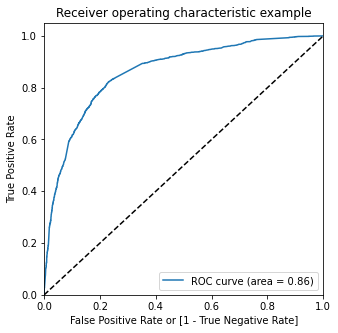

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.586190,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.731619,6138,1,1,1,1,1,1,1,1,1,0,0
2,1,0.526460,8650,1,1,1,1,1,1,1,0,0,0,0
3,0,0.065445,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.251450,6552,0,1,1,1,0,0,0,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.532661  0.981474  0.257298
0.2   0.2  0.718540  0.905263  0.603978
0.3   0.3  0.788505  0.824421  0.766469
0.4   0.4  0.797951  0.762526  0.819685
0.5   0.5  0.794749  0.674105  0.868768
0.6   0.6  0.790586  0.595368  0.910359
0.7   0.7  0.759046  0.447158  0.950400
0.8   0.8  0.733589  0.349053  0.969517
0.9   0.9  0.677073  0.170526  0.987858


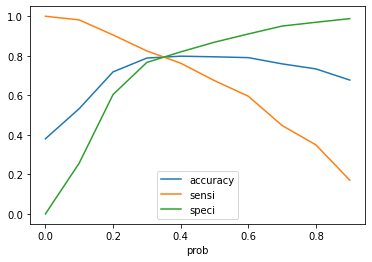

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.586190,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.731619,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.526460,8650,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.065445,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.251450,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [101]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)*100

80.0

In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3173,  698],
       [ 564, 1811]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7625263157894737

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8196848359597003

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18031516404029965


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7218015145476285


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8490767995718491


## Precision and Recall

#Looking at the confusion matrix again

In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3173,  698],
       [ 564, 1811]], dtype=int64)

##### Precision
TP / TP + FP

In [110]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7218015145476285

##### Recall
TP / TP + FN

In [111]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7625263157894737

Using sklearn utilities for the same

In [112]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7218015145476285

In [113]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7625263157894737

### Precision and recall tradeoff

In [114]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    1
 6245    1
 Name: final_predicted, Length: 6246, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

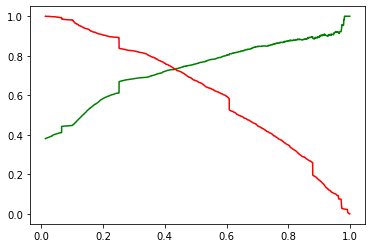

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [117]:
X_test[['Do Not Email','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']] =scaler.transform(X_test[['Do Not Email', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit', 'A free copy of Mastering The Interview']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7625,-0.285584,-0.397202,2.077703,-0.136180,1.494296,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5207,-0.285584,0.297929,0.739164,0.926758,1.494296,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2390,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4362,-0.285584,-0.397202,-0.455310,-0.136180,-0.669212,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1023,-0.285584,4.121147,-0.300302,1.458226,-0.669212,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_test = X_test[col7]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
7625,2.077703,0,0,0,0,0,0,0
5207,0.739164,0,0,0,0,0,0,0
2390,-0.878390,0,0,0,0,0,0,1
4362,-0.455310,0,0,0,0,0,0,1
1023,-0.300302,0,0,0,0,0,0,0


In [119]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2678, 9)

Making predictions on the test set

In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
y_test_pred[:10]

7625    0.752081
5207    0.404978
2390    0.341051
4362    0.453575
1023    0.175759
8226    0.606284
3079    0.185706
530     0.187871
7873    0.065445
5146    0.826168
dtype: float64

In [122]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head
y_pred_1.head()

,0
7625,0.752081
5207,0.404978
2390,0.341051
4362,0.453575
1023,0.175759


In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [125]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [126]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7625,0.752081
1,1,5207,0.404978
2,1,2390,0.341051
3,0,4362,0.453575
4,0,1023,0.175759


In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,7625,0.752081
1,1,5207,0.404978
2,1,2390,0.341051
3,0,4362,0.453575
4,0,1023,0.175759


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [132]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,7625,0.752081,1
1,1,5207,0.404978,1
2,1,2390,0.341051,0
3,0,4362,0.453575,1
4,0,1023,0.175759,0


In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1351,  333],
       [ 254,  740]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.780806572068708

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.744466800804829

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.8022565320665083

In [138]:
Imp_leads=y_pred_final.loc[y_pred_final['Converted_Prob']>=0.80]
Imp_leads

,Converted,Prospect ID,Converted_Prob,final_predicted
9,1,5146,0.826168,1
19,1,6313,0.857527,1
23,1,3473,0.878938,1
24,1,4371,0.878938,1
29,1,6728,0.883185,1
...,...,...,...,...
2642,1,4677,0.928815,1
2650,1,4816,0.888133,1
2653,1,4788,0.971100,1
2669,1,4680,0.991617,1


In [139]:
Imp_leads['Prospect ID'].values.reshape(-1)

array([5146, 6313, 3473, 4371, 6728, 9084, 3194, 2568, 5090, 2341, 5742,
       6242, 7565, 6252, 8888, 4551, 8962, 2665, 3641, 6874, 4860, 3406,
       8749, 3045, 4791, 3151, 2961, 2490, 5792,  460, 5698, 8623, 8094,
        187, 6028, 1575, 2673, 3447, 4775, 4856, 8745, 5510, 5732, 1324,
       5686, 8950, 4297, 8540, 4628, 5790,  841, 4978, 4892, 3339, 3342,
       7065, 8088, 1290, 4002, 5697, 8556, 5275, 9201, 2571, 1311, 1332,
       1559, 3660, 1693, 3265, 4793, 7470, 5535, 6651, 5815, 5210, 9061,
       5807, 7467, 6741, 6866, 1061, 8198, 7347, 5430, 2657, 6608, 6229,
       5641, 6375, 2114, 6167, 6171, 2525, 6933, 2760, 8060,  807, 4241,
       4784, 4269, 6567, 1995, 6094, 8191, 7725, 7674, 1299, 5931,  737,
       5688, 4781, 2473, 2132, 2962, 6550, 7098, 3929, 5451, 4062,  650,
       3461, 5882, 8711, 9211, 7991,  161, 9196, 3291, 1767, 6379, 6645,
       8184, 8099, 1542, 7039, 8505, 6829, 3763, 2022, 3350, 8601, 4295,
       2085, 3147, 3900, 3242, 3439, 2907,  556, 76

In [140]:
Imp_leads

,Converted,Prospect ID,Converted_Prob,final_predicted
9,1,5146,0.826168,1
19,1,6313,0.857527,1
23,1,3473,0.878938,1
24,1,4371,0.878938,1
29,1,6728,0.883185,1
...,...,...,...,...
2642,1,4677,0.928815,1
2650,1,4816,0.888133,1
2653,1,4788,0.971100,1
2669,1,4680,0.991617,1


In [141]:
# Install the jovian Python library
!pip install jovian --upgrade -q

In [142]:
# Import the library in your Jupyter notebook
import jovian

<IPython.core.display.Javascript object>

In [143]:
# Upload your notebook & get a sharing link with a single command
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········


ApiError: The API key provided is invalid or expired.